In [170]:
class LinearSystem:
    def __init__(self):
        self.solutions = []
        
    def get_det(self, A):
        if not self.is_square(A):
            print("Determinant of non-square matrices not possible")
        else:
            if len(A)==2:
                return A[0][0]*A[1][1]-A[0][1]*A[1][0]
            det = 0
            for c in range(len(A)):
                det += ((-1)**c)*A[0][c]*self.get_det(self.get_minor_matrix(A,0,c))
                
            return det

    def get_minor_matrix(self, A, r, c):
        return [row[:c] + row[c+1:] for row in (A[:r] + A[r+1:])]
    
    def get_zero_matrix(self, r, c):
        return [[0 for _ in range(c)] for _ in range(r)]
    
    def get_dim(self, M):
        return (len(M), len(M[0]))
                    
    def copy_matrix(self, M):
        dim = self.get_dim(M)
        rows = dim[0]
        cols = dim[1]
        copy = self.get_zero_matrix(rows, cols)
        
        for i in range(rows):
            for j in range(cols):
                copy[i][j] = M[i][j]
                
        return copy
    
    def is_square(self, M):
        dim = self.get_dim(M)
        return dim[0]==dim[1]
    
    def is_singular(self, M):
        if not self.is_square(M):
            return False
            
        if(self.get_det(M)==0):
            return True
        else:
            return False
    
    def get_transpose(self, M):
        
        if not isinstance(M[0], list):
            M = [M]
            
        dim = self.get_dim(M)
        rows = dim[0]
        cols = dim[1]
        transpose = []
        for k in range(cols):
            col = [M[r][k] for r in range(rows)]
            transpose.append(col)
            
        return transpose
    
    def augment(self, M, b):
        augment = self.copy_matrix(M)
        k = 0
        for i in augment:
            i.append(b[k][0])
            k+=1
        
        return augment
    
    def gaussian_elimination(self, augmented_matrix):
        rows, cols = self.get_dim(augmented_matrix)
        for i in range(rows):
            pivotrow = i
            for j in range(i+1, rows):
                if abs(augmented_matrix[j][i]) > abs(augmented_matrix[pivotrow][i]):
                    pivotrow = j
            for k in range(i, cols):
                temp = augmented_matrix[i][k]
                augmented_matrix[i][k] = augmented_matrix[pivotrow][k]
                augmented_matrix[pivotrow][k] = temp
            for j in range(i+1, rows):
                temp = augmented_matrix[j][i]/augmented_matrix[i][i]
                for k in range(i, cols):
                    augmented_matrix[j][k] = float("%.2f" % (augmented_matrix[j][k] - augmented_matrix[i][k] * temp))
        
        return augmented_matrix
    
    def print_gaussian(self, augmented_matrix):     
        augmented_matrix = self.gaussian_elimination(augmented_matrix)
        for row in augmented_matrix:
            row = [str(float("%.2f"%i)) for i in row]
            print("\t".join(row))
    
    def get_nature_of_solutions(self, augmented_matrix):
        if(augmented_matrix[-1][-2]==0 and augmented_matrix[-1][-1]==0):
            print("Consistent, singular and infinite solutions")
        elif(augmented_matrix[-1][-2]!=0 and augmented_matrix[-1][-1]==0):
            print("Inconsistent, singular and no solution")
        else:
            print("Consistent, non-singular, unique solution")
            
    def solution_type_code(self, augmented_matrix):
        code = -1
        if(augmented_matrix[-1][-2]==0 and augmented_matrix[-1][-1]==0):
            code = 0
        elif(augmented_matrix[-1][-2]!=0 and augmented_matrix[-1][-1]==0):
            code = 1
        else:
            code = 2
        
        return code
    
    def get_upper_triangular(self, A):
        rows, cols = self.get_dim(A)
        C = self.copy_matrix(A)
        
        for i in range(rows):
            pivotrow = i
            for j in range(i+1, rows):
                if abs(C[j][i]) > abs(C[pivotrow][i]):
                    pivotrow = j
            for k in range(i, cols):
                temp = C[i][k]
                C[i][k] = C[pivotrow][k]
                C[pivotrow][k] = temp
            for j in range(i+1, rows):
                temp = C[j][i]/C[i][i]
                for k in range(i, cols):
                    C[j][k] = C[j][k] - C[i][k] * temp
        
        return C
    
    def get_rank(self, A):
        upper = self.get_upper_triangular(A)
        rows, cols = self.get_dim(A)
        
        rank = cols
        for row in upper:
            if(len(set(row))==1 and list(set(row))[0]==0):
                rank -= 1
        return rank
    
    def solve_equation(self, lhs, rhs):
        lhs = lhs[::-1]
        if(len(lhs)==1):
            return rhs/lhs[0]
        else:
            target_flag = False
            aggregate = 0
            k = 0
            for i in lhs[1:]:
                aggregate += self.solutions[::-1][k]*i
                k+=1
            return (rhs-aggregate)/lhs[0]
                
            
    def back_substitution(self, U):
        sol_nature = self.solution_type_code(U)
        if sol_nature==2:
            i = 0
            for row in U[::-1]:
                rhs = row[-1]
                self.solutions.append(self.solve_equation(row[::-1][1:2+i], rhs))
                i+=1
            temp = self.solutions
            self.solutions = []
            return temp

    def LU_decompose(self, A):
        if(self.is_square(A)):
            rows, col = self.get_dim(A)
            temp = self.copy_matrix(A)
            L = self.get_zero_matrix(rows, col)
            U = self.get_zero_matrix(rows, col)

            for i in range(len(L)):
                L[i][i] = 1

            for k in range(rows):
                U[k][k] = temp[k][k]

                for i in range(k+1, rows):
                    L[i][k] = temp[i][k]/temp[k][k]
                    U[k][i] = temp[k][i]

                for i in range(k+1, rows):
                    for j in range(k+1, rows):
                        temp[i][j] = temp[i][j] - L[i][k]*U[k][j]

            return L, U
        
        else:
            return None, None        
    
    def forward_substitue(self, U):
        y = []
        for i in range(len(U)):
            rhs = U[i][-1]
            if i==0:
                y.append([rhs/U[i][0]])
            else:
                k = 0
                aggregate = 0
                for j in U[i][:i]:
                    aggregate += U[i][k]*y[k][0]
                    k += 1
                y.append([(rhs - aggregate)/U[i][i]])
                
        return y

    def LU_solve(self, A, b):
        L, U = self.LU_decompose(A)
        
        augment_L = self.augment(L, b)
        y = self.forward_substitue(augment_L)
        augment_U = self.augment(U, y)
        
        return self.back_substitution(augment_U)
    
    def compare_algorithms(self, A, n):
        rows, col = self.get_dim(A)
        time_data_gauss = {}
        time_data_lu = {}
        
        for i in range(1,n):
            time_g = 0
            time_lu = 0
            
            for j in range(i):
                b = [[random.randint(3, 100)] for _ in range(rows)]
                augment = self.augment(A, b)
                start_g = time.time()
                aug_gauss = self.gaussian_elimination(augment)
                x = self.back_substitution(aug_gauss)
                end_g = time.time()
                
                start_lu = time.time()
                x = self.LU_solve(A, b)
                end_lu = time.time()
                
                time_g += (end_g - start_g)
                time_lu += (end_lu - start_lu)
                
            time_data_gauss[i] = time_g
            time_data_lu[i] = time_lu
        
        plt.plot(list(time_data_gauss.keys()), list(time_data_gauss.values()))
        plt.plot(list(time_data_lu.keys()), list(time_data_lu.values()), color="red")

        plt.show()
        
    #TODO: Write forward subsitute and use backward substitute to solve using LU decomposition [done]
    #Ly = b, get y solve with forward substitute [done]
    #Ux = y, get x solve with back substitute [done]
    #generate b vectors and measure time for gaussian elimination vs LU decomposition
    #plot graph for the above comparison


In [171]:
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
A = [[2,1,1],[4,-6,0],[-2,7,2]]
b = [[5],[-2],[9]]

In [173]:
m = LinearSystem()

In [174]:
aug = m.augment(A, b)
post_elimination = m.gaussian_elimination(aug)

In [175]:
m.get_nature_of_solutions(post_elimination)

Consistent, non-singular, unique solution


In [176]:
m.get_upper_triangular(A)

[[4, -6, 0], [0.0, 4.0, 1.0], [0.0, 0.0, 1.0]]

In [177]:
m.back_substitution(post_elimination)

[2.0, 1.0, 1.0]

In [178]:
L, U = m.LU_decompose(A)

In [179]:
L

[[1, 0, 0], [2.0, 1, 0], [-1.0, -1.0, 1]]

In [180]:
U

[[2, 1, 1], [0, -8.0, -2.0], [0, 0, 1.0]]

In [181]:
l_augment = m.augment(L, b)

In [182]:
y = m.forward_substitue(l_augment)

In [183]:
u_augment = m.augment(U, y)

In [184]:
m.back_substitution(u_augment)

[2.0, 1.0, 1.0]

In [185]:
m.LU_solve(A, b)

[2.0, 1.0, 1.0]

In [186]:
time.time()

1581324689.9259233

In [187]:
random.randint(0,1000)

795

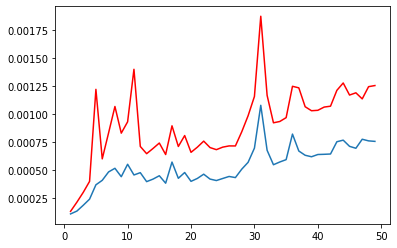

In [188]:
m.compare_algorithms(A, 50)

In [189]:
A = [[random.randint(3, 100) for _ in range(100)] for _ in range(100)]

In [ ]:
m.compare_algorithms(A, 50)